# Market Capitalization Data Discovery
[Portfolio Analysis](https://tradewithpython.com/portfolio-analysis-using-python)

In [94]:
import pandas as pd

_l_coin_ids = [
    "bitcoin",
    "ethereum",
    "bitcoin_cash",
    "litecoin",
    "ripple",
    "solana",
    "cardano"
]
market_df = pd.DataFrame([],columns=["Date"])
coin_df = pd.DataFrame([])
for coin_id in _l_coin_ids:
    _fname = "./data/market_cap_"+str(coin_id)+".csv"
    coin_df = pd.read_csv(_fname)
    market_df[coin_id] = coin_df["market_cap"]
market_df["Date"] = coin_df["Date"]
market_df = market_df.sort_values(by="Date")
market_df.head(5)

,Date,bitcoin,ethereum,bitcoin_cash,litecoin,ripple,solana,cardano
0,2022-04-01,8.650101e+11,3.946285e+11,7.303137e+09,8.649611e+09,3.922930e+10,4.003617e+10,3.656444e+10
1,2022-04-02,8.791442e+11,4.148549e+11,7.154450e+09,8.737260e+09,3.981387e+10,4.373610e+10,3.731910e+10
2,2022-04-03,8.710503e+11,4.135953e+11,7.105597e+09,8.740255e+09,3.981635e+10,4.326046e+10,3.729870e+10
3,2022-04-04,8.823466e+11,4.234105e+11,7.201794e+09,9.029301e+09,4.054552e+10,4.442666e+10,3.795078e+10
4,2022-04-05,8.855850e+11,4.233679e+11,7.147809e+09,8.737515e+09,3.980981e+10,4.307222e+10,3.887032e+10


Correlation between Coins in your portfolio


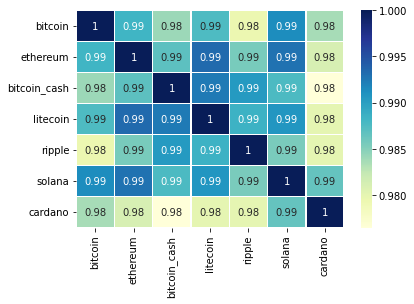

Covariance between Coins in your portfolio


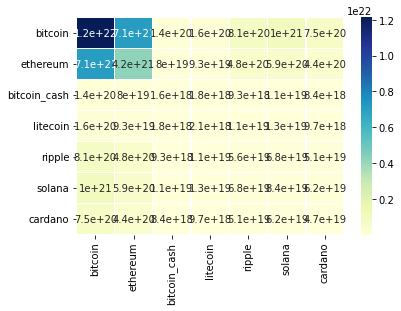

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


correlation_matrix = market_df.corr(method='pearson')
covariance_matrix = market_df.cov(min_periods=7,ddof=1)
#correlation_matrix
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Coins in your portfolio')
plt.show(fig1)
fig2 = plt.figure()
sb.heatmap(covariance_matrix,xticklabels=covariance_matrix.columns, yticklabels=covariance_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Covariance between Coins in your portfolio')
plt.show(fig2)

## Market capital
Plot the market capital time series to see the behaviour

In [105]:
import plotly.express as px

#df = px.data.stocks()
_title = "Market Capitalization from "+str(market__cap_df["Date"].min())+ \
        " to "+str(market__cap_df["Date"].max())
fig = px.line(market_df, x="Date", y=market_df.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title=_title)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

# Index by Market Caps

Apply the [custom market cap index based method](https://medium.com/python-financial-analysis/python-financial-analysis-4-3-market-cap-based-index-329b908f75dc). 
1. sort the table by the market cap in descending order
1. take just the first N rows
1. get tickers that belong to the Ns, and transform it to a list “tickers_topN”
1. iterate over the N tickers
   1. market_cap” selects a column
      1. multiply the weight “w” to created column “marketcap_weighted_ave_topN”

In [108]:
import plotly.express as px

for coin in _l_coin_ids:
    weighted_col_name = "weighted_"+coin
    market_df[weighted_col_name]=market_df[coin]/market_df[coin].sum()

_l_weighted_cols = ['Date',
                    'weighted_bitcoin',
                    'weighted_ethereum',
                    'weighted_bitcoin_cash',
                    'weighted_litecoin',
                    'weighted_ripple',
                    'weighted_solana',
                    'weighted_cardano']
weighted_market_df = market_df[_l_weighted_cols]

_title = "Weighted Market Capitalization Index from "+str(market_df["Date"].min())+ \
            " to "+str(market_df["Date"].max())
fig = px.line(weighted_market_df, x="Date", y=weighted_market_df.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title=_title)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

## Simple Returns
1. Compute the ___percentage change___ between the current and a prior value, for each coin.
1. Plot the returns to examine coins with high and low ___volatility___.

In [145]:
''' Daily simple returns '''

import plotly.express as px

simple_returns_df = market_df[_l_coin_ids].pct_change(periods=1)
simple_returns_df["Date"] = market_df["Date"]
simple_returns_df.dropna(inplace=True)

_title = "Expected Returns from "+str(market__cap_df["Date"].min())+ \
        " to "+str(market__cap_df["Date"].max())
fig = px.line(simple_returns_df, x="Date", y=simple_returns_df.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title=_title)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

#simple_returns_df.plot(kind="line",
#               figsize=(20,10),
#               title=_title,
#               fontsize=12)

## Average Daily Returns
Calculate the average daily returns for each coin

In [146]:
print('Average Daily returns(%) of coins:\n')
Avg_daily = simple_returns_df.mean()
print(Avg_daily*100)
#print(Avg_daily)

Average Daily returns(%) of coins:

bitcoin        -0.534843
ethereum       -0.726146
bitcoin_cash   -0.972560
litecoin       -0.816693
ripple         -0.978821
solana         -1.257517
cardano        -0.838294
dtype: float64


/tmp/ipykernel_25542/3504244102.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



## Risk of Daily Returns
The box plot will reveal the:
1. largest spread in the box plot shows the coin with the highest _average daily returns_
1. coin with the positive outliers translates into a higher average daily return

In [142]:
import plotly.express as px

_title = "Risk Box Plot from "+str(market__cap_df["Date"].min())+ \
        " to "+str(market__cap_df["Date"].max())

df = simple_returns_df[_l_coin_ids].melt(var_name="quartilemethod")

fig = px.box(df, facet_col="quartilemethod", color="quartilemethod",
             boxmode="overlay", points='all', title=_title)

for col_idx, col_name in enumerate(_l_coin_ids):
    # use: quartilemethod = {linear, inclusive, exclusive}
    fig.update_traces(quartilemethod="linear", jitter=0, col=col_idx)
fig.show()

#simple_returns_df.plot(kind = "box",
#                       figsize = (20,10), 
#                       title = _title)

## Returns Per Unit Risk
1. Calculate each coins' ___standard deviation___
1. Calculate ___periodic standard deviation___ (annualized standard deviation)
1. Coin with higher ratio is better beacuse it has the best ___Return to Risk ratio___
1. Also known as the ___Sharpe Ratio___
   1. it is a measure of risk-adjusted return
   1. it describes how much excess return is  receive for the volatility of holding a riskier asset

In [103]:
from datetime import datetime
date_format = "%Y-%m-%d"
max_date = datetime.strptime(market__cap_df["Date"].max(), date_format)
min_date = datetime.strptime(market__cap_df["Date"].min(), date_format)
Ndays = (max_date - min_date).days

print("Annualized Standard Deviation Volatality for %s trading days" % (str(Ndays)))
print("of individual coins on the basis of daily simple returns.")
print(simple_returns_df.std() * np.sqrt(Ndays) * 100)

Annualized Standard Deviation Volatality for 60 trading days
of individual coins on the basis of daily simple returns.
bitcoin         26.670552
ethereum        32.993196
bitcoin_cash    39.968617
litecoin        40.099241
ripple          37.222461
solana          53.962996
cardano         51.280810
dtype: float64


## Cummilative Product

Cummulative Returns


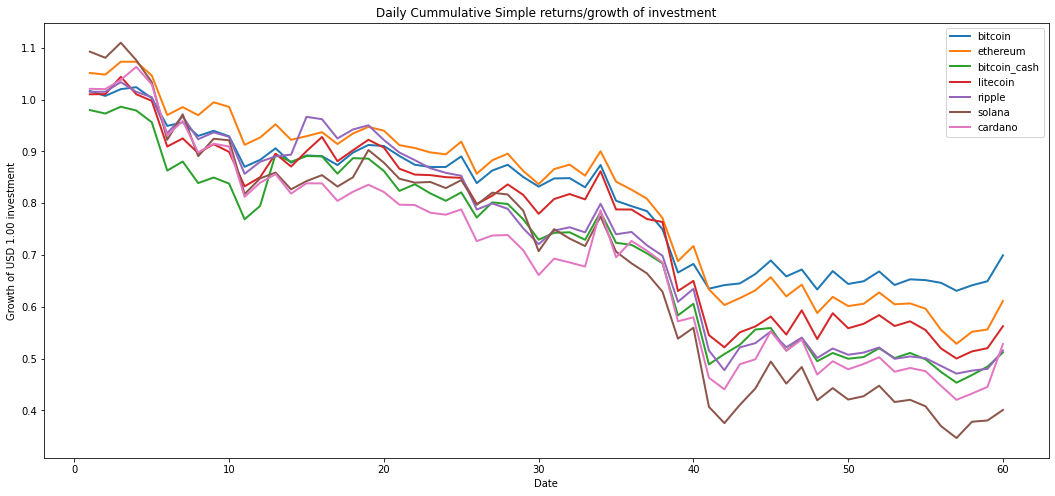

In [170]:
_investment = 1.0 # USD

_simple_returns_df = market_df[_l_coin_ids].pct_change(periods=1)
simple_returns_df.dropna(inplace=True)
daily_cummulative_simple_return = (_simple_returns_df+_investment).cumprod()

#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of USD 1.00 investment')
plt.show(fig)

# DEPRECATED

<AxesSubplot:title={'center':'Market Capitalization from 2022-04-01 to 2022-05-31'}>

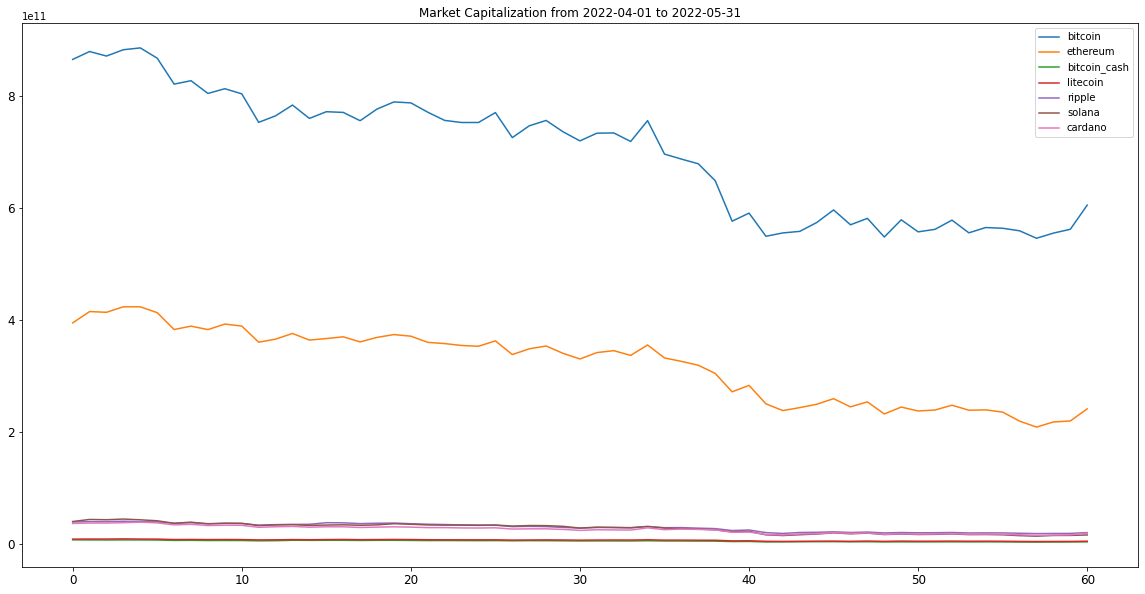

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
''' Get the market capitalization from dataframe '''
_l_mark_cap_cols = ['Date',
                    'bitcoin',
                    'ethereum',
                    'bitcoin_cash',
                    'litecoin',
                    'ripple',
                    'solana',
                    'cardano']
market__cap_df = market_df[_l_mark_cap_cols]

''' Plot Market Cap Historic Values '''
_title = "Market Capitalization from "+str(market__cap_df["Date"].min())+ \
        " to "+str(market__cap_df["Date"].max())
market__cap_df.plot(kind="line",
               figsize=(20,10),
               title=_title,
               fontsize=12)

Text(0, 0.5, 'Weighted Index')

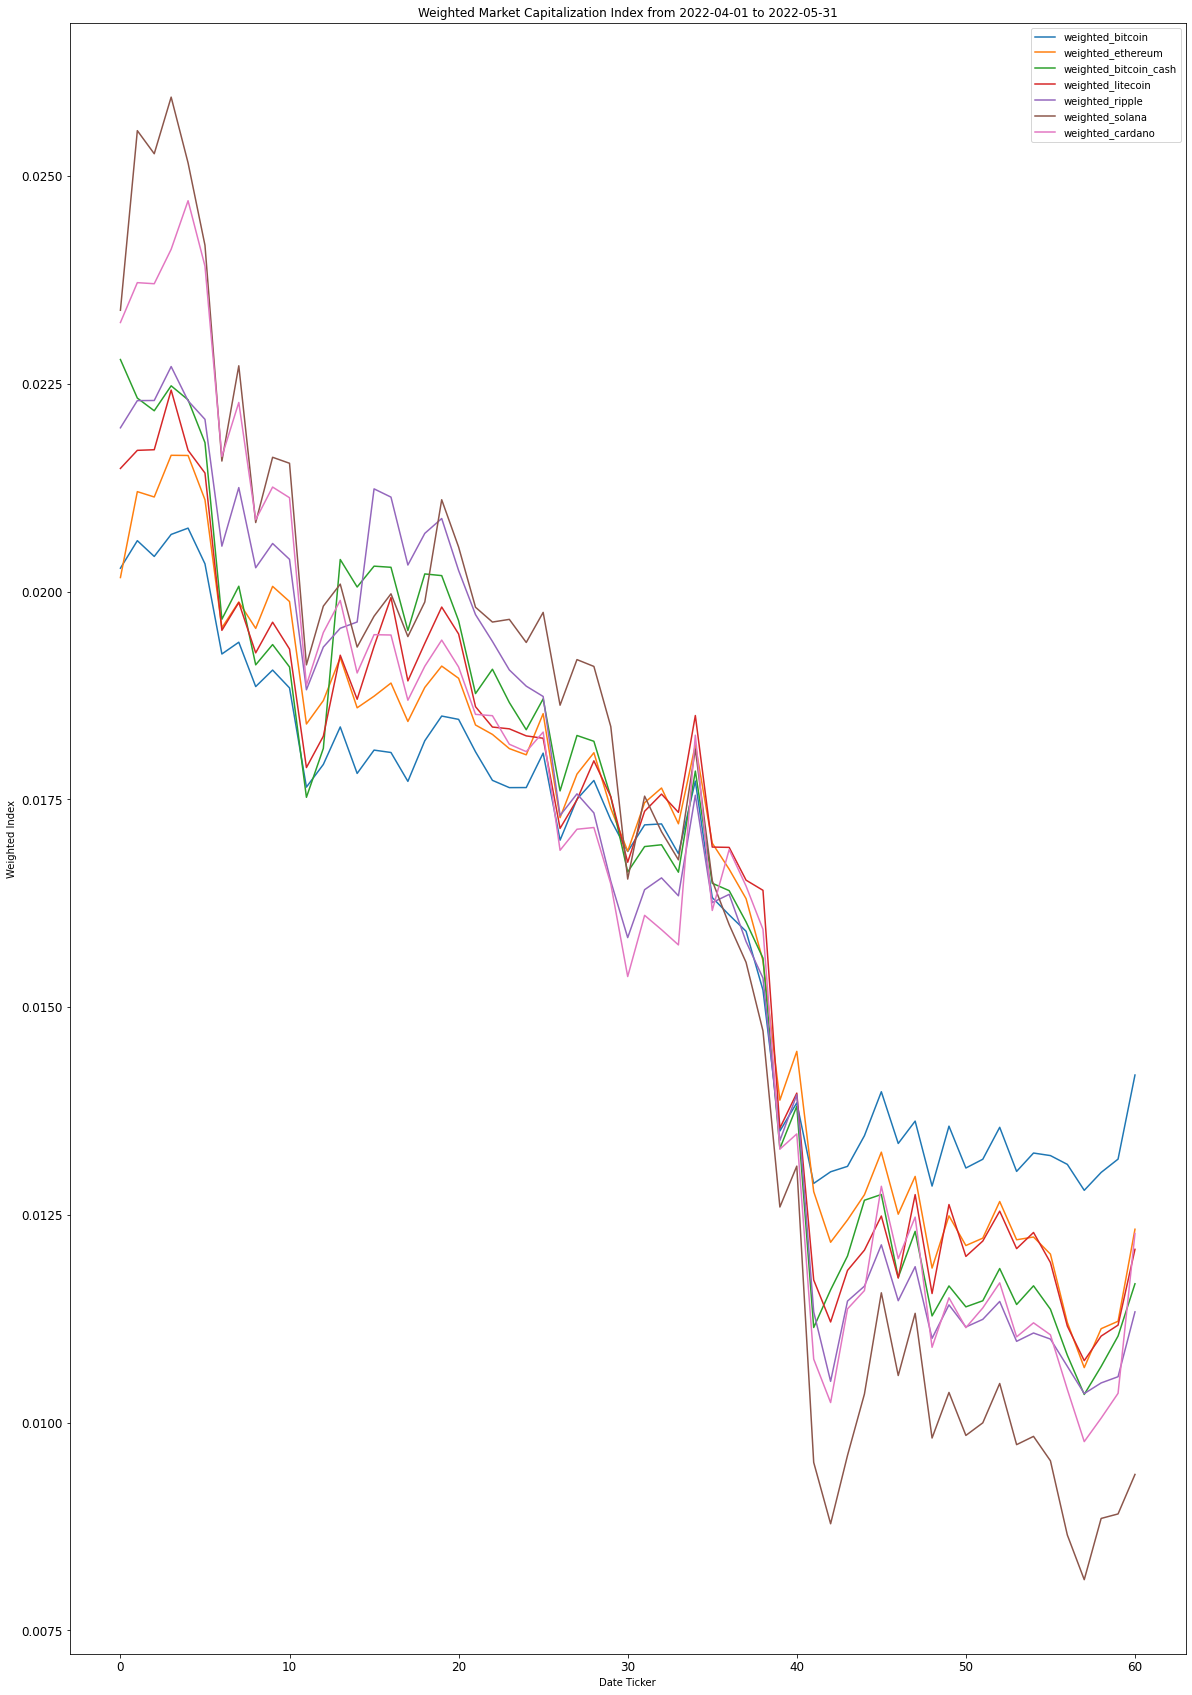

In [91]:
_title = "Weighted Market Capitalization Index from "+str(market_df["Date"].min())+" to "+str(market_df["Date"].max())
ax = weighted_market_df.plot(kind="line",
                             figsize=(20,30),
                             title=_title,
                             fontsize=12)
ax.set_xlabel("Date Ticker")
ax.set_ylabel("Weighted Index")